In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("Arrest_Data_from_2010_to_Present.csv")

In [6]:
data.head(5)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,4248313,02/24/2015,1310.0,20,Olympic,2022,37,M,H,5.0,Burglary,F,459PC,BURGLARY,5TH,WILTON,"(34.0653, -118.314)"
1,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
2,4254777,02/26/2015,2010.0,19,Mission,1985,22,M,H,6.0,Larceny,M,459.5PC,SHOPLIFTING,8300 VAN NUYS BL,NaN,"(34.2216, -118.4488)"
3,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
4,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"


In [7]:
data['date'] = pd.to_datetime(data['Arrest Date'])
data['year'], data['month'] = data['date'].dt.year, data['date'].dt.month

In [34]:
data.head(5)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,date,year,month
0,4248313,02/24/2015,1310.0,20,Olympic,2022,37,M,H,5.0,Burglary,F,459PC,BURGLARY,5TH,WILTON,"(34.0653, -118.314)",2015-02-24,2015,2
1,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)",2019-05-03,2019,5
2,4254777,02/26/2015,2010.0,19,Mission,1985,22,M,H,6.0,Larceny,M,459.5PC,SHOPLIFTING,8300 VAN NUYS BL,NaN,"(34.2216, -118.4488)",2015-02-26,2015,2
3,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)",2019-04-29,2019,4
4,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)",2019-04-30,2019,4


In [9]:
# Q1: How many bookings of arrestees were made in 2018?
len(np.unique(data[data['year'] == 2018]['Report ID'].to_numpy()))

104277

In [19]:
# Q2: What is the 95% quantile of the age of the arrestee in 2018? Only consider the following charge groups for your analysis:
"""
Vehicle Theft: "TAKE VEHICLE W/O OWNER'S CONSENT"
Robbery: 'ATTEMPT - ROBBERY', 'ROBBERY'
Burglary:   'BURGLARY', 'ATTEMPT - BURGLARY', 'BURGLARY FROM VEHICLE'
Receive Stolen Property: 'RECEIVING KNOWN STOLEN PROPERTY >$950', 'GRAND THEFT MONEY/PROPERTY > $400', 'ATTEMPT RECEIVING STOLEN PROPERTY>$400'

tmp = list(data[data['year'] == 2018]['Charge Description'])
for text in tmp:
    if not text:
        continue
    try:
        if "PROPERTY" in text:
            print(text)
    except:
        print(text)
"""
texts = ["TAKE VEHICLE W/O OWNER'S CONSENT", 
         'ATTEMPT - ROBBERY', 
         'ROBBERY', 
         'BURGLARY', 
         'ATTEMPT - BURGLARY', 
         'BURGLARY FROM VEHICLE', 
         'RECEIVING KNOWN STOLEN PROPERTY >$950', 
         # 'GRAND THEFT MONEY/PROPERTY > $400', 
         'ATTEMPT RECEIVING STOLEN PROPERTY>$400']

dataQ2 = data[data['year'] == 2018][data['Charge Description'].isin(texts)]
ages= list(dataQ2['Age'])

# plt.plot(ages)
print(np.percentile(ages, 95.0))
# print(len([age for age in ages if age > 53]))
# print(len([age for age in ages if age < 53]))


52.0


/home/kaizhang/anaconda3/envs/dataIncu/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [20]:
# Q3: How many bookings of arrestees were made in the area with the most arrests in 2018?
dataQ3 = data[data['year'] == 2018][['Report ID','Area ID']]
dataQ3.groupby(['Area ID']).agg(['count'])

,Report ID
,count
Area ID,
1,10951
2,7345
3,5927
4,3590
5,3875
6,9715
7,2467
8,2687


In [27]:
# Q4 : Z score
dataQ4 = data[data['year'] == 2018]
dataQ4 = dataQ4[~dataQ4['Charge Group Description'].isin(["Pre-Delinquency", "Non-Criminal Detention"])]
dataQ4 = dataQ4.dropna(axis = 0, subset=['Charge Group Code'])
dataQ4 = dataQ4[['Age', 'Charge Group Code']].groupby(["Charge Group Code"]).agg("mean")
dataQ4

,Age
Charge Group Code,
1.0,30.470803
2.0,35.168254
3.0,27.182992
4.0,34.434622
5.0,30.391216
6.0,33.776565
7.0,29.821615
8.0,34.091311
9.0,34.265060


In [28]:
from scipy import stats
zscores = stats.zscore(list(dataQ4['Age']))
np.max(np.abs(zscores))

3.4857051927589593

/home/kaizhang/anaconda3/envs/dataIncu/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


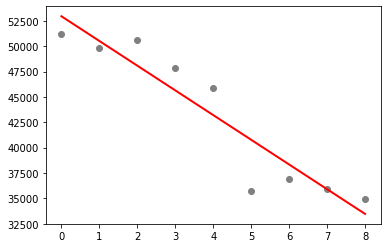

[[31037.80555556]]


In [37]:
# Q5: Predict 2019 Arrest number

nums = []
for year in range(2010, 2019):
    nums.append(data[data['year'] == year][data['Arrest Type Code'] == 'F'].shape[0])


from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
X = np.array(range(0,9)).reshape(-1,1)
Y = np.array(nums).reshape(-1,1)
             
regressor.fit(X, Y) #training the algorithm
y_pred = regressor.predict(X)

plt.scatter(X, Y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()

print(regressor.predict([[9]]))

In [38]:
# Q6: How many arrest 2 km from the Bradbury Building in 2018? (34.050536, -118.247861)
print(data.shape)
dataQ6 = data[data['year'] == 2018][['Location']]
print(dataQ6.shape)
dataQ6 = dataQ6[~dataQ6['Location'].isin(['(0.0, 0.0)'])]
print(dataQ6.shape)

def mapToDis(x):
    x = x.lstrip("(").rstrip(")").split(",")
    x = [float(t) for t in x ]

    x[0] = float(x[0])
    x[1] = float(x[1])
    
    deltaPhi = (x[0] - 34.050536) /180 * np.pi
    deltaLambda = (x[1] - (-118.247861)) /180 * np.pi
    phiM = (x[0] + 34.050536)/2 /180 * np.pi
    D = 6371000 * np.sqrt(deltaPhi ** 2 + (np.cos(phiM) * deltaLambda) ** 2)
    return D

dataQ6['Distance'] = dataQ6['Location'].map(mapToDis)
dists = list(dataQ6['Distance'])
print(len([dis for dis in dists if dis <= 2000]))

(1310127, 20)
(104277, 1)
(104260, 1)
11461


(613, 2)


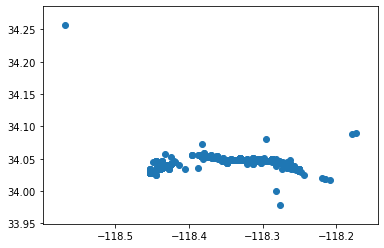

Latitude mean is 34.0433352365416
Longtude mean is -118.34985905383358
Latitude std is 0.012387495595559779
Longtude std is 0.06890497679768672
605
[  34.0281 -118.453 ]
[  34.0188 -118.2159]
Pico street length is 21.875430097184957
No. arrests per kilo on PICO street in 2018 is 27.656599084552607


In [42]:
# Q7: How many arrest incidents were made per kilometer on Pico Boulevard during 2018? 
dataQ7 = data[data['year'] == 2018][["Location", 'Address']]
filterRow = []
for i, a in enumerate(list(dataQ7['Address'])):
    if 'PICO' in a:
        # print(a)
        filterRow.append(i)
        
# print(filterRow)
dataQ7 = dataQ7.iloc[filterRow, :]
print(dataQ7.shape)

def stringToDis(x):
    x = x.lstrip("(").rstrip(")").split(",")
    x = [float(t) for t in x ]

    x[0] = float(x[0])
    x[1] = float(x[1])
    return [x[0], x[1]]

locationsQ7 = list(dataQ7['Location'])
locationsQ7 = np.array([stringToDis(x) for x in locationsQ7])
locationsQ7
plt.scatter(locationsQ7[:,1], locationsQ7[:,0])
plt.show()

LatiMean = np.mean(locationsQ7[:,0])
LatiStd =  np.std(locationsQ7[:,0])
LongMean = np.mean(locationsQ7[:,1])
LongStd = np.std(locationsQ7[:,1])

print('Latitude mean is', LatiMean)
print('Longtude mean is', LongMean)
print('Latitude std is', LatiStd)
print('Longtude std is', LongStd)

locationsQ7_removeOutlier = []
for loc in locationsQ7:
    if (loc[0] > LatiMean - 2*LatiStd and loc[0] < LatiMean + 2*LatiStd) and \
        (loc[1] > LongMean - 2*LongStd and loc[1] < LongMean + 2*LongStd): 
        locationsQ7_removeOutlier.append(loc)
    
print(len(locationsQ7_removeOutlier))

locationsQ7_removeOutlier = np.array(locationsQ7_removeOutlier)

mostWesternPoint = locationsQ7_removeOutlier[np.argmin(locationsQ7_removeOutlier[:,1]), :]
mostEasternPoint = locationsQ7_removeOutlier[np.argmax(locationsQ7_removeOutlier[:,1]), :]

print(mostWesternPoint)
print(mostEasternPoint)

deltaPhi = (mostWesternPoint[0] - mostEasternPoint[0]) /180 * np.pi
deltaLambda = (mostWesternPoint[1] - mostEasternPoint[1]) /180 * np.pi
phiM = (mostWesternPoint[0] + mostEasternPoint[0]) /2 /180 * np.pi
PicoLen = 6371000 * np.sqrt(deltaPhi ** 2 + (np.cos(phiM) * deltaLambda) ** 2)
PicoLen /= 1000 # convert to kilometer

print("Pico street length is", PicoLen)
print("No. arrests per kilo on PICO street in 2018 is", locationsQ7_removeOutlier.shape[0]/PicoLen)

In [46]:
# Q8: 
print(data.shape)
dataQ8 = data[data['year'] < 2019][["Area ID", "Charge Group Code"]]
print(dataQ8.shape)
dataQ8 = dataQ8.dropna(axis = 0, subset=['Charge Group Code'])
print(dataQ8.shape)
dataQ8 = dataQ8[dataQ8["Charge Group Code"] != 99.0]
print(dataQ8.shape)
dataQ8

# for code in list(dataQ8['Charge Group Code']):
#     if code == 99.0:
#         print(code)

# dataQ8 = dataQ8.groupby(["Area ID", "Charge Group Code"]).size().reset_index(name="Count")
# print(np.sum(list(dataQ8['Count'])))

dataQ8 = pd.crosstab(dataQ8["Area ID"], dataQ8["Charge Group Code"], rownames=["Area ID"], 
                       colnames=["Charge Group Code"],margins=True)
dataQ8 = dataQ8/dataQ8.loc["All","All"]

resQ8 = np.empty(shape=(dataQ8.shape[0]-1,dataQ8.shape[1]-1))
for i in range(resQ8.shape[0]):
    for j in range(resQ8.shape[1]):
        resQ8[i, j] = dataQ8.iloc[i, j]/ dataQ8.iloc[i, -1] / dataQ8.iloc[-1, j]

resQ8 = resQ8.flatten()
np.mean(np.sort(resQ8)[-5:])

(1310127, 20)
(1231627, 2)
(1151720, 2)
(1151713, 2)


3.5150763798652016